# Climate Region Wheat EDA 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
hp=pd.read_csv('./highplains_state_wheat_bu.csv')
mid=pd.read_csv('./midwest_wheat_bu.csv')
ne=pd.read_csv('./northeast_wheat_bu.csv')
west=pd.read_csv('./west_wheat_bu.csv')

In [3]:
hp.head()

,Program,Year,Period,Week Ending,Geo Level,State,State ANSI,Ag District,Ag District Code,County,...,Zip Code,Region,watershed_code,Watershed,Commodity,Data Item,Domain,Domain Category,Value,CV (%)
0,CENSUS,2017,YEAR,NaN,STATE,CALIFORNIA,6,NaN,NaN,NaN,...,NaN,NaN,0,NaN,WHEAT,"WHEAT - PRODUCTION, MEASURED IN BU",TOTAL,NOT SPECIFIED,"17,904,328",7.5
1,CENSUS,2017,YEAR,NaN,STATE,COLORADO,8,NaN,NaN,NaN,...,NaN,NaN,0,NaN,WHEAT,"WHEAT - PRODUCTION, MEASURED IN BU",TOTAL,NOT SPECIFIED,"88,276,724",6.7
2,CENSUS,2017,YEAR,NaN,STATE,KANSAS,20,NaN,NaN,NaN,...,NaN,NaN,0,NaN,WHEAT,"WHEAT - PRODUCTION, MEASURED IN BU",TOTAL,NOT SPECIFIED,"319,315,035",3.7
3,CENSUS,2017,YEAR,NaN,STATE,MONTANA,30,NaN,NaN,NaN,...,NaN,NaN,0,NaN,WHEAT,"WHEAT - PRODUCTION, MEASURED IN BU",TOTAL,NOT SPECIFIED,"137,206,204",4.9
4,CENSUS,2017,YEAR,NaN,STATE,NEBRASKA,31,NaN,NaN,NaN,...,NaN,NaN,0,NaN,WHEAT,"WHEAT - PRODUCTION, MEASURED IN BU",TOTAL,NOT SPECIFIED,"47,165,208",4.6


In [4]:
hp.shape

(55, 21)

In [5]:
hp.isnull().sum()

Program              0
Year                 0
Period               0
Week Ending         55
Geo Level            0
State                0
State ANSI           0
Ag District         55
Ag District Code    55
County              55
County ANSI         55
Zip Code            55
Region              55
watershed_code       0
Watershed           55
Commodity            0
Data Item            0
Domain               0
Domain Category      0
Value                0
CV (%)              33
dtype: int64

In [6]:
def column_eda(df):
    df.columns=df.columns.str.lower().str.replace(' ','_')
    df.drop(columns=['ag_district','ag_district_code','county','period','watershed_code','county_ansi','zip_code','region','watershed','week_ending','geo_level','domain_category','data_item','program'],inplace=True)
    df['year']=pd.to_datetime(df['year'],format='%Y')
    df.set_index('year', inplace=True)
    df.sort_index(axis=0,inplace=True)
    df['value'].replace(',','',inplace=True, regex=True)
    df['value'].replace(' (D)',None, inplace=True)
    df['value'].dropna(inplace=True)
    df['value']=df['value'].astype(int)
    
    
    return df
    

In [7]:
column_eda(hp)
column_eda(mid)
column_eda(ne)
column_eda(west)

,state,state_ansi,commodity,domain,value,cv_(%)
year,,,,,,
1997-01-01,WASHINGTON,53,WHEAT,TOTAL,160547364,NaN
1997-01-01,ARIZONA,4,WHEAT,TOTAL,9255555,NaN
1997-01-01,CALIFORNIA,6,WHEAT,TOTAL,42544545,NaN
1997-01-01,UTAH,49,WHEAT,TOTAL,7968490,NaN
1997-01-01,NEVADA,32,WHEAT,TOTAL,1922456,NaN
1997-01-01,OREGON,41,WHEAT,TOTAL,57614403,NaN
1997-01-01,IDAHO,16,WHEAT,TOTAL,112491692,NaN
2002-01-01,WASHINGTON,53,WHEAT,TOTAL,128410931,NaN
2002-01-01,UTAH,49,WHEAT,TOTAL,3847763,NaN


In [8]:
mid['value'].isnull().sum()

0

In [9]:
west.dtypes

state         object
state_ansi     int64
commodity     object
domain        object
value          int64
cv_(%)        object
dtype: object

In [25]:
def mean_bar(df):
    return df.groupby(by=['state'])[['value']].mean().plot(kind='barh',figsize=(12,8));
    

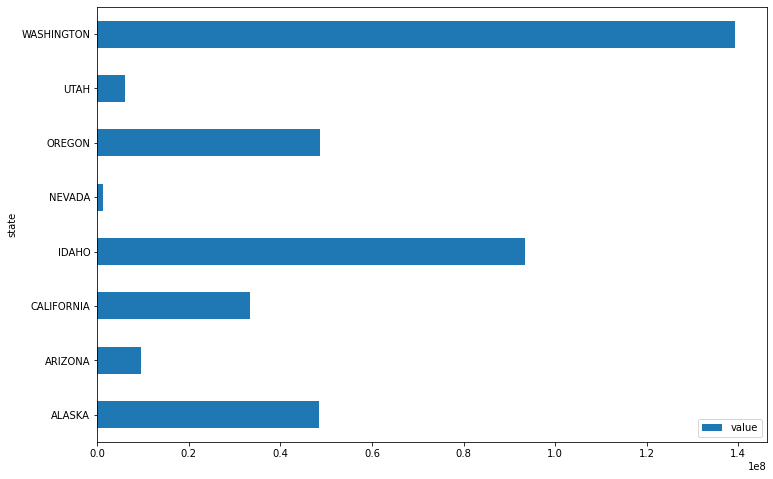

In [26]:
mean_bar(west);

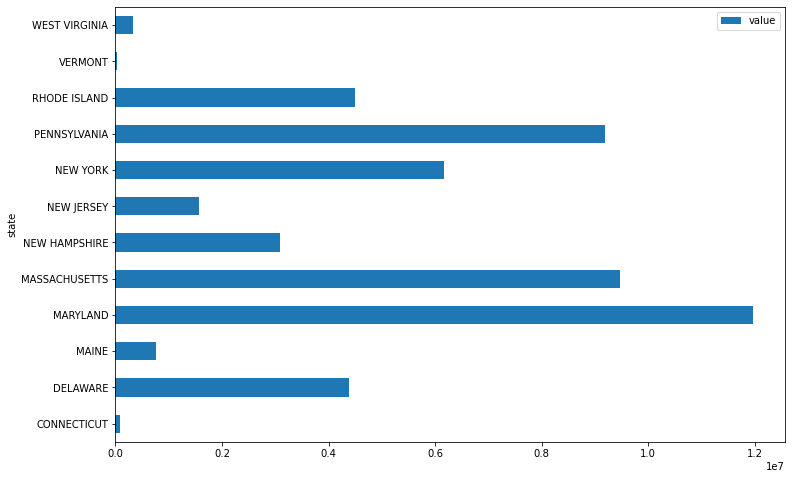

In [28]:
mean_bar(ne);

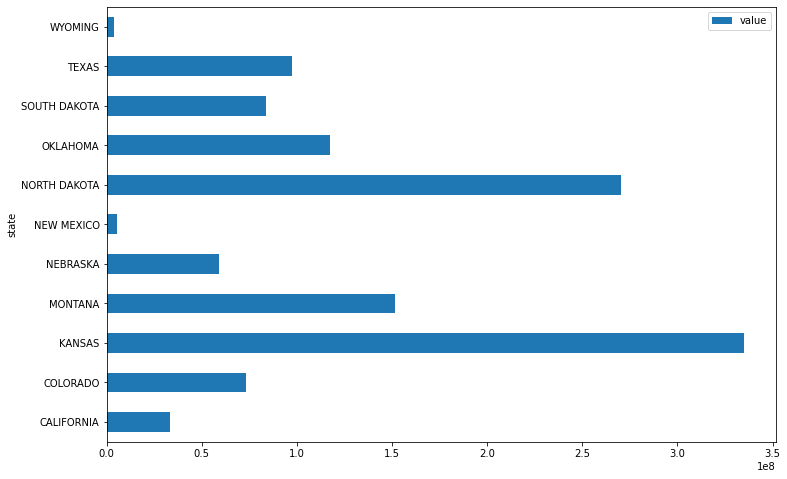

In [30]:
mean_bar(hp);

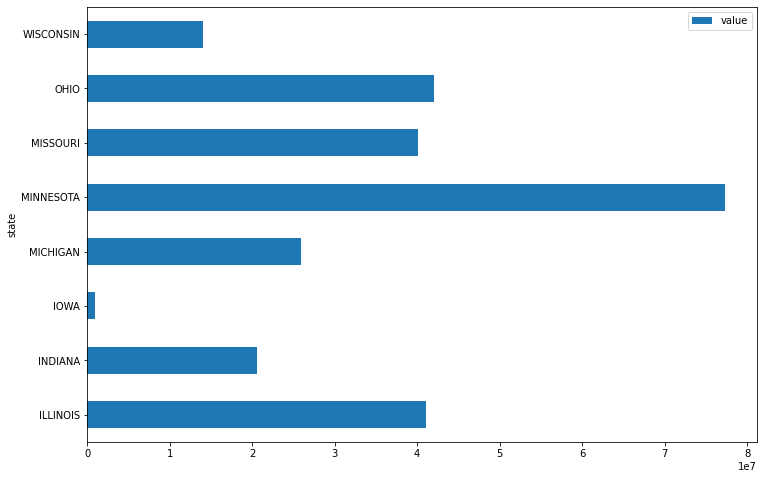

In [31]:
mean_bar(mid);

In [35]:
def plot_bar(df):
    return df.groupby(by=['state'])[['value']].mean().plot(figsize=(12,8));
    

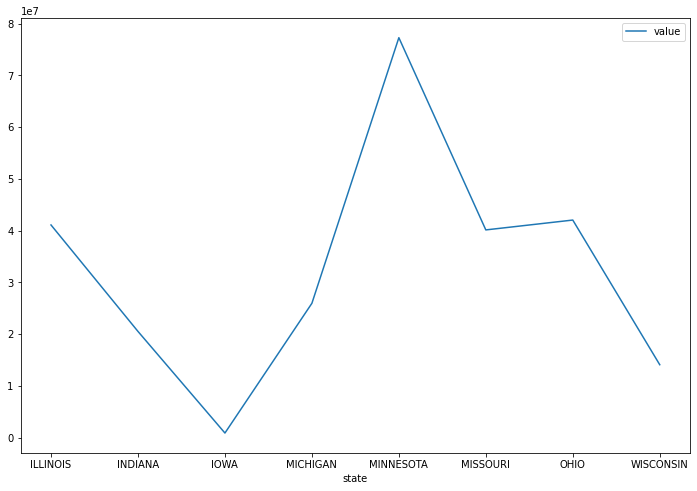

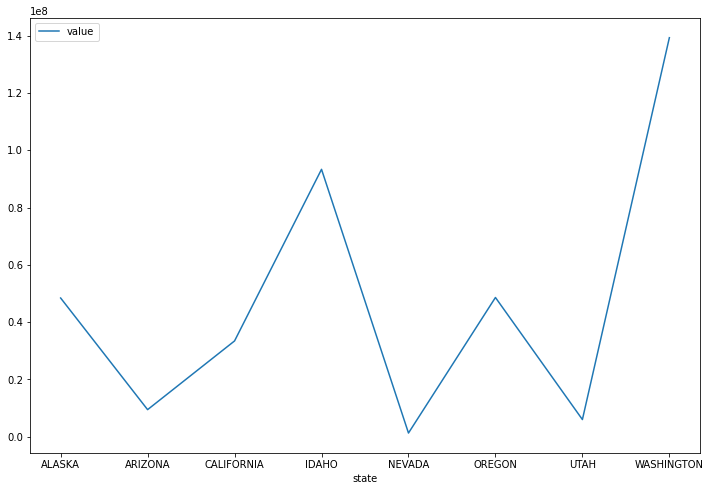

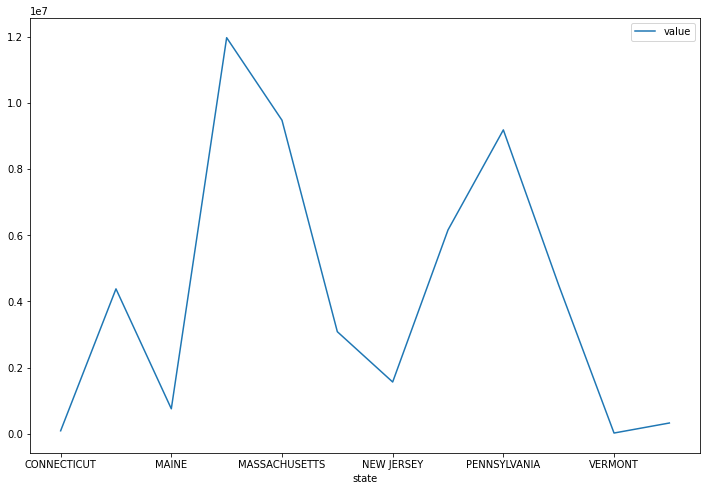

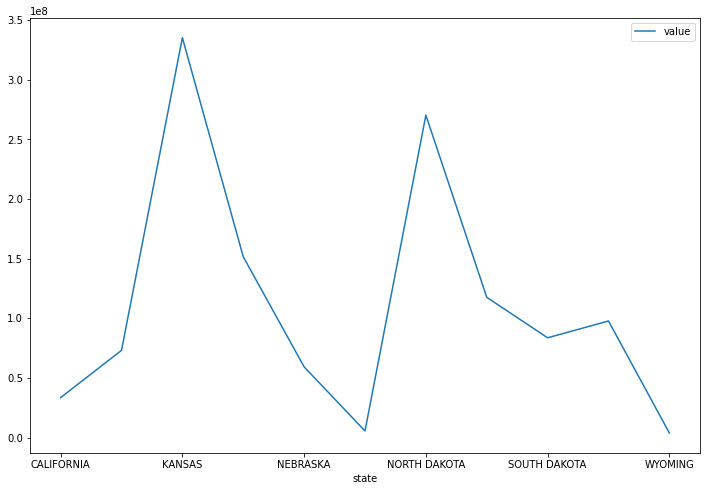

In [38]:
plot_bar(mid)
plot_bar(west)
plot_bar(ne)
plot_bar(hp);

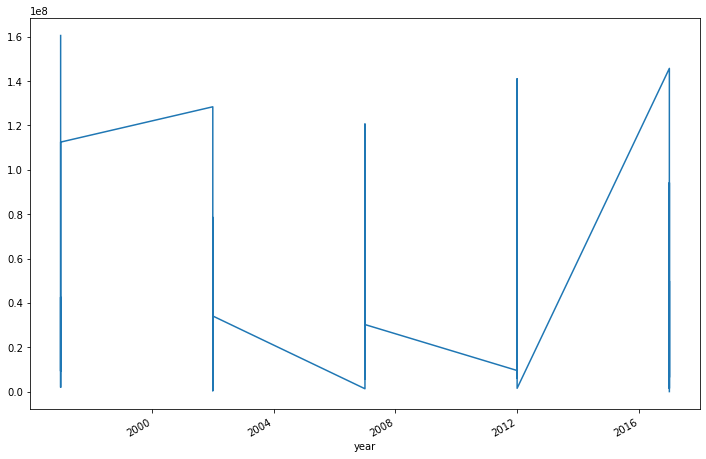

In [45]:
west['value'].plot(figsize=(12,8));

In [47]:
cali=west[west['state'].isin(['CALIFORNIA'])]

cali.head()

,state,state_ansi,commodity,domain,value,cv_(%)
year,,,,,,
1997-01-01,CALIFORNIA,6,WHEAT,TOTAL,42544545,NaN
2002-01-01,CALIFORNIA,6,WHEAT,TOTAL,33590674,NaN
2007-01-01,CALIFORNIA,6,WHEAT,TOTAL,30224394,NaN
2012-01-01,CALIFORNIA,6,WHEAT,TOTAL,42955324,3.4
2017-01-01,CALIFORNIA,6,WHEAT,TOTAL,17904328,7.5


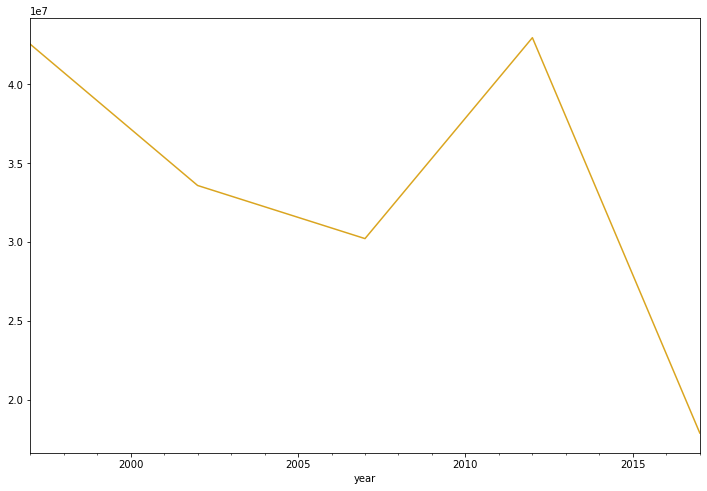

In [51]:
cali['value'].plot(figsize=(12,8),color='goldenrod');